<h1 style= 'text-align:center;'> Week 4: Descriptive Modeling </h1>

<p style= 'text-align: center;'> Bernard Owusu Sefah</p>

<p style= 'text-align: center;'> 4.2 4.2 Assignment: Clustering Exercise</p>

<p style= 'text-align: center;'> DSC 630</p>



In [1]:
# load the data and inspect its structure to understand which columns might not be relevant to the ALS condition, then proceed with further steps.
import pandas as pd

# Load the data
file_path = 'als_data.csv'
als_data = pd.read_csv(file_path)

# Display the first few rows and the columns to inspect the structure
als_data.head(), als_data.columns

(   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
 0   1        65         57.0            40.5         38.0       0.066202   
 1   2        48         45.0            41.0         39.0       0.010453   
 2   3        38         50.0            47.0         45.0       0.008929   
 3   4        63         47.0            44.0         41.0       0.012111   
 4   5        63         47.0            45.5         42.0       0.008292   
 
    ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
 0     -0.965608                30                 28.0                22  ...   
 1     -0.921717                37                 33.0                21  ...   
 2     -0.914787                24                 14.0                10  ...   
 3     -0.598361                30                 29.0                24  ...   
 4     -0.444039                32                 27.5                20  ...   
 
    Sodium_min  Sodium_range  SubjectID  t

The dataset contains various columns, including patient IDs, physiological measures, ALS-related scores, and ranges of values. To ensure focus on relevant features for clustering based on ALS condition, I will remove non-ALS-related columns like the ID, SubjectID, and other columns that do not directly impact ALS.

## Step 1: Remove any data that is not relevant to the patient’s ALS condition.

In [2]:
#Keeping columns that seem to be related to ALS progression and patient conditions

als_data_relevant = als_data.drop(columns=['ID', 'SubjectID'])

# Display the remaining columns after dropping irrelevant ones
als_data_relevant.columns

Index(['Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range',
       'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range',
       'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range',
       'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min',
       'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max',
       'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min',
       'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max',
       'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range',
       'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min',
       'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min',
       'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min',
       'Chloride_range', 'Creatinine_max', 'Creatinine_median',
       'Creatinine_mi

The remaining columns include several physiological measurements and ALS-related metrics. Removing of ID and SubjectID was success

# Step 2: Apply a standard scaler to the data.

Will apply a standard scaler to normalize the data for clustering 

In [3]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to the relevant ALS data
scaler = StandardScaler()
scaled_als_data = scaler.fit_transform(als_data_relevant)

# Check the scaled data by displaying the first few rows
scaled_als_data[:5]

array([[ 9.17136983e-01,  3.08941722e+00, -1.30078105e+00,
        -8.66550089e-01,  5.48092948e+00, -3.81450341e-01,
        -3.18520120e-01,  1.34959879e-01,  2.47367899e-01,
        -3.01588467e-01, -6.79085269e-01, -7.04767241e-01,
        -4.46605772e-01, -4.53086914e-01, -3.43749805e-01,
        -1.64404050e-01,  1.97133625e-01, -2.53516298e-01,
        -2.83618538e-01,  4.71373703e-01,  7.62329697e-01,
         4.90774047e-02,  2.92859599e-01,  1.16967352e+00,
         1.78065854e+00, -4.03233483e-01, -2.31901530e-01,
         2.60443579e-01, -1.05509751e-01,  2.89532342e-01,
         8.16773688e-01,  7.74853650e-01,  1.39114351e+00,
         3.27228335e-01,  1.11898292e-01, -1.41443932e+00,
        -1.33418881e-02,  8.63964983e-01,  7.06250323e-01,
         1.93837712e+00,  1.08444436e+00,  2.60029864e-01,
         3.99225881e-02,  8.27717849e-01,  1.01594400e+00,
        -7.33335170e-01, -1.32592025e+00,  1.09146338e-01,
        -7.97425559e-01, -3.79966423e-02,  7.89353067e-0

With the above data being successfully scaled will proceed to creating a plot of the cluster silhouette score

## Step 3: Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

Will use different values for the number of clusters (e.g., from 2 to 10) and calculate the silhouette score for each, then plot the results.

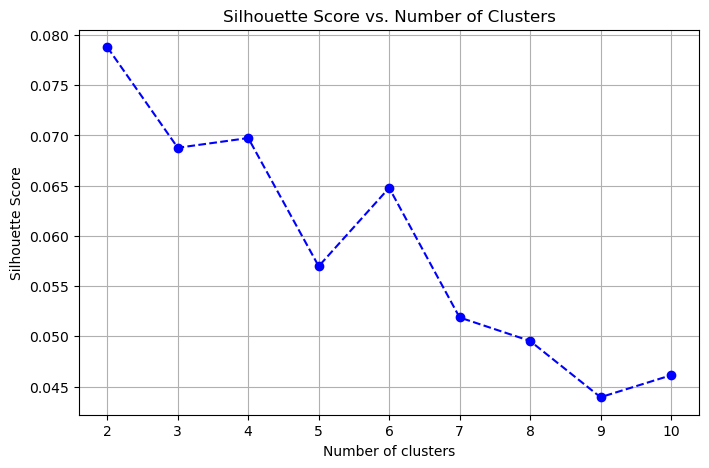

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

# Setting the environment variable to prevent memory leak in Windows with MKL
os.environ['OMP_NUM_THREADS'] = '9'

# Define range for number of clusters
cluster_range = range(2, 11)
silhouette_scores = []

# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # n_init set to 10 to remove the warning
    cluster_labels = kmeans.fit_predict(scaled_als_data)
    silhouette_avg = silhouette_score(scaled_als_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


#### Plot Interpretation:
The Silhouette Score represents how well each point in a cluster is similar to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.
* The peak silhouette score is at 2 clusters, indicating that using 2 clusters might result in the most distinct separation between clusters.
* After 2 clusters, the silhouette score generally declines, showing that increasing the number of clusters does not improve the clustering significantly.
Given this plot, 2 or possibly 3 clusters seem to be optimal choices, with 2 clusters being the most well-defined.

## Step 4: Choosing the optimal number of clusters

From the plot, 2 clusters is the optimal choice based on the highest silhouette score. The score drops significantly after 2 clusters.

## Step 5: Fit a K-means model to the data with 2 clusters

In [5]:
# Fit K-means model with 2 clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_als_data)

# The cluster labels (0 or 1) are now assigned to each data point
print(cluster_labels[:10])  # Print first 10 cluster assignments

[1 1 0 1 0 1 0 0 1 0]


Each number in this array (either 0 or 1) represents the cluster assignment of the corresponding data point in the dataset.

* Cluster 0: Data points assigned to cluster 0.
* Cluster 1: Data points assigned to cluster 1.
The first data point (at index 0) is assigned to Cluster 1, the second data point (at index 1) is also assigned to Cluster 1, and the third data point (at index 2) is assigned to Cluster 0.

In other words, K-means has divided the dataset into two groups (clusters), and each point has been assigned to one of the two clusters based on the features in the dataset.

## Step 6: Fit a PCA transformation with two features to the scaled data

Will now reduce the dimensionality of the scaled data to 2 features using PCA, which will help visualize the clustering results.

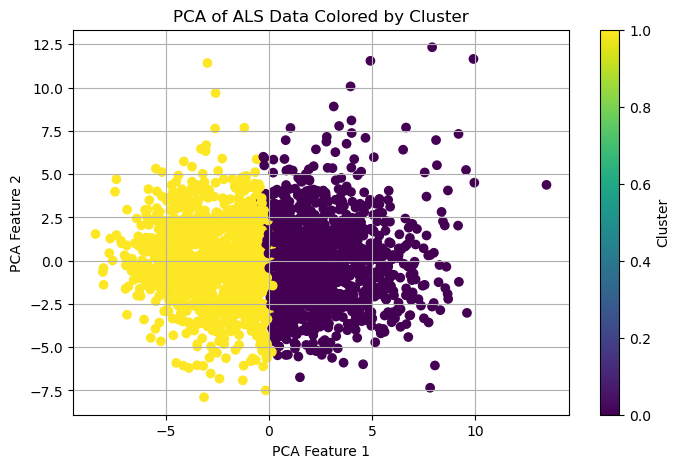

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA and transform the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_als_data)

# Make a scatter plot of the PCA transformed data, coloring each point by its cluster
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA of ALS Data Colored by Cluster')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#### Plot Details:
1. PCA Transformation:
* The data has been reduced to two dimensions (PCA Feature 1 and PCA Feature 2) from its original high-dimensional space.
* PCA Feature 1 and PCA Feature 2 represent the two most significant principal components that capture the maximum variance in the data. Essentially, PCA helps visualize high-dimensional data in a lower-dimensional space (2D in this case) while preserving as much information as possible.

2. Cluster Assignments:
* The data points are colored based on their cluster assignments from the K-means model.
* Yellow points represent data assigned to Cluster 0.
* Purple points represent data assigned to Cluster 1.
* The color bar on the right shows the cluster values, where 0 corresponds to yellow and 1 corresponds to purple.

3. Interpretation of Clusters:
* The points are relatively well separated into two distinct groups, showing that the clustering was able to differentiate between two distinct patterns in the ALS dataset.
* The plot shows that most points from Cluster 0 are located on the left side (yellow region), while points from Cluster 1 are on the right side (purple region).
* There is some overlap between the two clusters, which is expected in most real-world data, but overall, the separation seems reasonably clear.

4. Separation in PCA Space:
* The horizontal axis (PCA Feature 1) appears to be the primary dimension separating the clusters, as the majority of separation happens along this axis.
* The vertical axis (PCA Feature 2) shows less variation between clusters, suggesting that most of the variance captured by PCA is in PCA Feature 1.

## Conclusion 

In this analysis, applied K-means clustering to anonymized ALS patient data and visualized the results using PCA. Here are the key steps and findings:

1. Data Preparation:
* Irrelevant columns such as ID and SubjectID were removed to focus on features related to ALS.
* The remaining dataset was scaled using a StandardScaler to ensure that all features were on a similar scale, improving the effectiveness of clustering algorithms.

2. Optimal Number of Clusters:
* To determine the optimal number of clusters, evaluated the silhouette scores for different cluster numbers (ranging from 2 to 10).
* The silhouette score plot showed that 2 clusters provided the highest score, indicating that two distinct groups could be meaningfully identified in the dataset.

3. K-means Clustering:
* Applied the K-means algorithm with 2 clusters based on the silhouette score results.
* Each patient in the dataset was assigned to one of the two clusters, representing distinct groups with different patterns in the dataset.

4. PCA Visualization:
* To visualize the clusters, reduced the high-dimensional dataset into two principal components using PCA.
* The PCA plot showed a clear separation between the two clusters, with one cluster (yellow) mainly occupying the left side of the plot, and the other cluster (purple) on the right.
* While some overlap between clusters was present, the general separation suggested that there are meaningful differences between the two groups.

Cluster Distinction: The K-means model successfully grouped the ALS patients into two distinct clusters, indicating that there are patterns in the data that differentiate patients into two broad categories.

Separation in PCA Space: The PCA plot highlights that most of the variation between the clusters is captured along PCA Feature 1, suggesting that one dimension in the data plays a significant role in differentiating the two groups.

Silhouette Scores: The silhouette score for two clusters was the highest, confirming that the choice of two clusters was appropriate for this dataset.

The analysis revealed that the ALS patient data can be effectively grouped into two clusters, which likely represent distinct patient profiles or stages of disease progression. Further investigation could involve analyzing the specific characteristics of each cluster to understand what differentiates the groups. This information could be useful in tailoring treatments or interventions based on the cluster a patient belongs to.